In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Carregar o conjunto de dados
data_path = '/content/sample_data/qualidade_vinho.csv'
df = pd.read_csv(data_path)


In [ ]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# Binarizar o atributo 'color'
df['color'] = LabelEncoder().fit_transform(df['color'])

In [ ]:
# Trazendo informações sobre o dataframe
(df.describe()) # Para rodar precisa binarizar a columa color


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
# Número de informações null
(df.isnull().sum())


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [ ]:
# Separar os atributos do conjunto de dados - nao é necessário
#features = df.drop(['quality', 'color'], axis=1)
# Normalizar as características (opcional, mas pode melhorar o desempenho do K-Means)
X = (df - df.mean()) / df.std()

In [ ]:
print('minmax %.4f'%PCA(n_components=2).fit(X).noise_variance_)
print('standart %.4f'%PCA(n_components=2).fit((df - df.mean()) / df.std()).noise_variance_)
print('noScale %.4f'%PCA(n_components=2).fit(df).noise_variance_)

minmax 0.5912
standart 0.5912
noScale 1.8811


<Axes: xlabel='pca_0', ylabel='pca_1'>

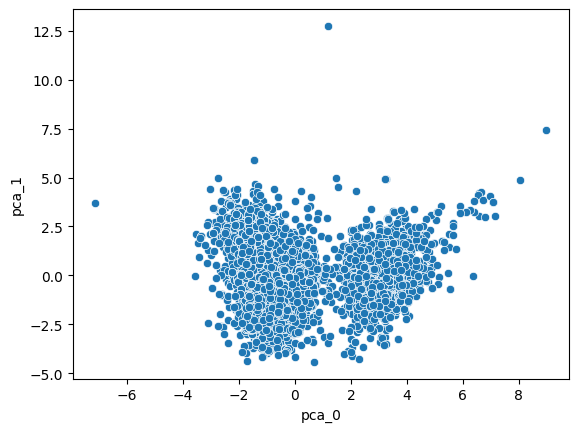

In [ ]:
pca = PCA(n_components=2)
pca_values = pd.DataFrame(pca.fit_transform(X))
pca_values = pca_values.rename({0: 'pca_0', 1: 'pca_1'}, axis = 1)
sns.scatterplot(data = pca_values, x = 'pca_0', y = 'pca_1')

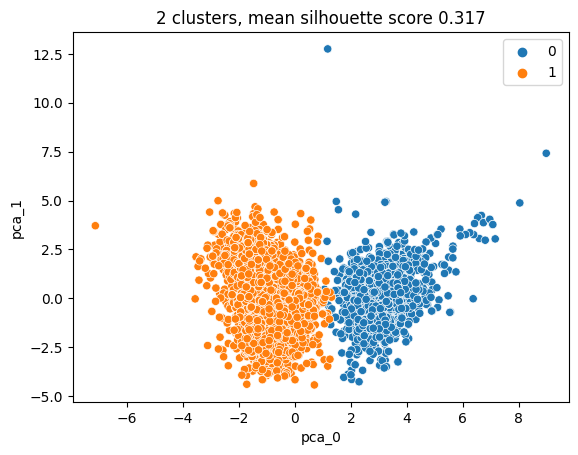

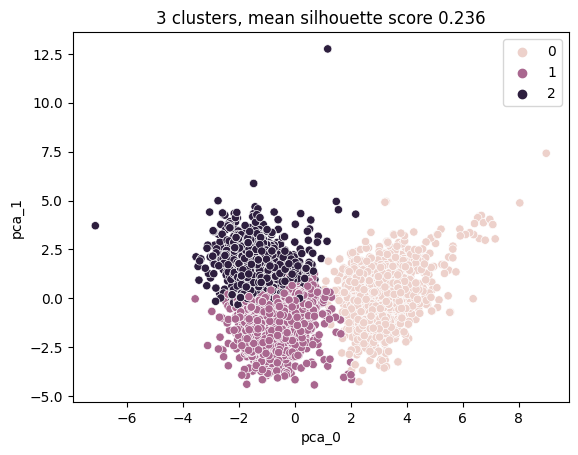

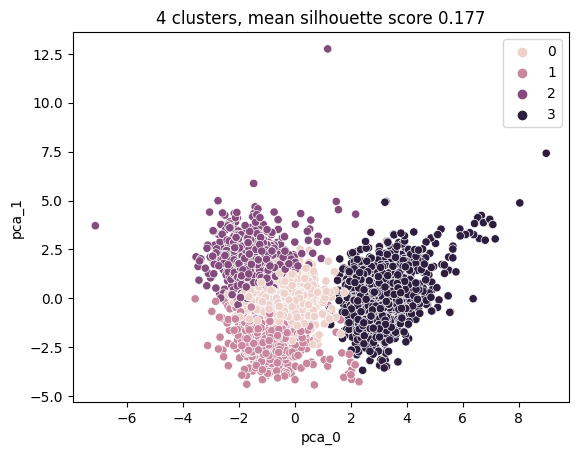

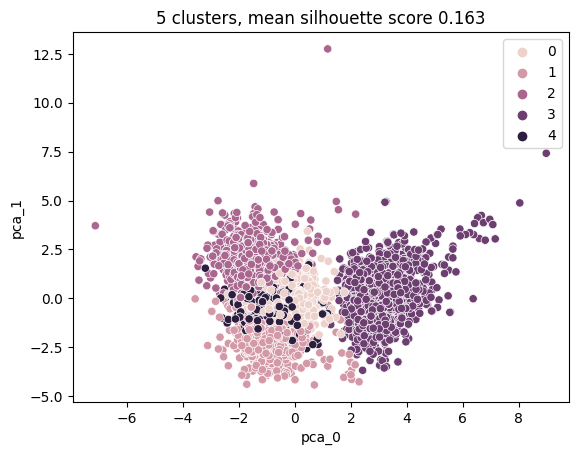

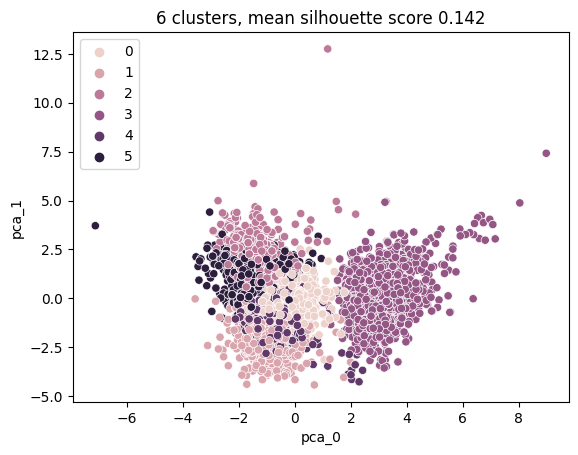

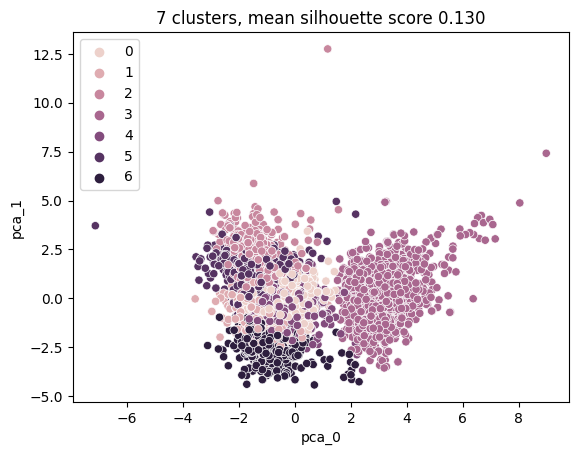

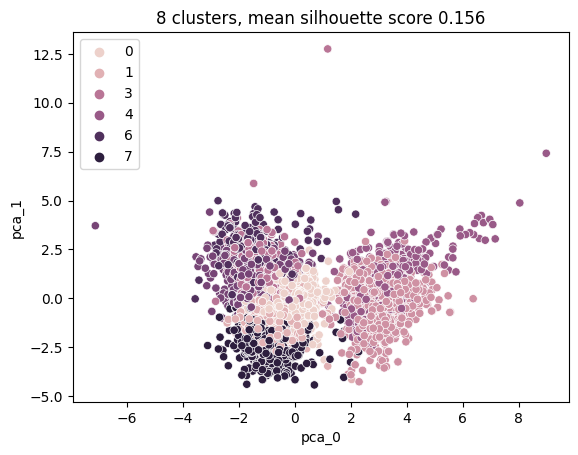

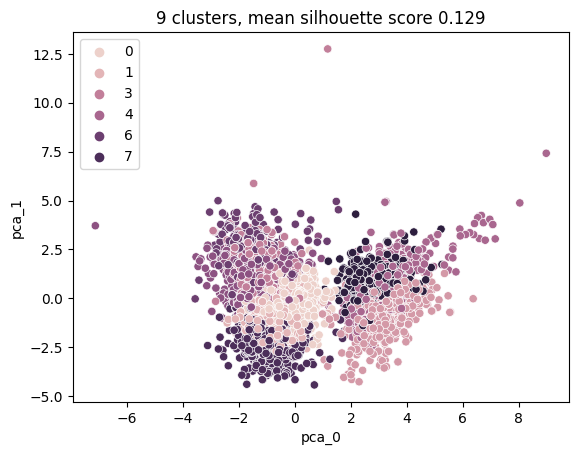

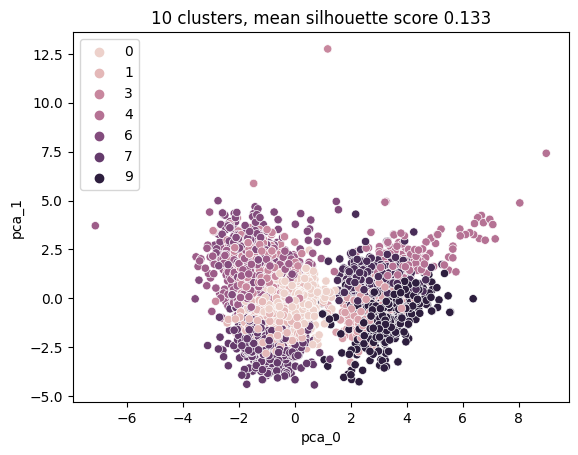

In [ ]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    sns.scatterplot(data = pca_values, x = 'pca_0', y = 'pca_1', hue = kmeans.labels_)
    sil = silhouette_score(X, kmeans.labels_)
    plt.title('%i clusters, mean silhouette score %.3f'%(k, sil))
    plt.show()

In [ ]:
# Função para plotar o gráfico de dispersão dos atributos quality e cor
def plot_scatter(x,y):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Gráfico de Dispersão')
    plt.grid()
    plt.show()


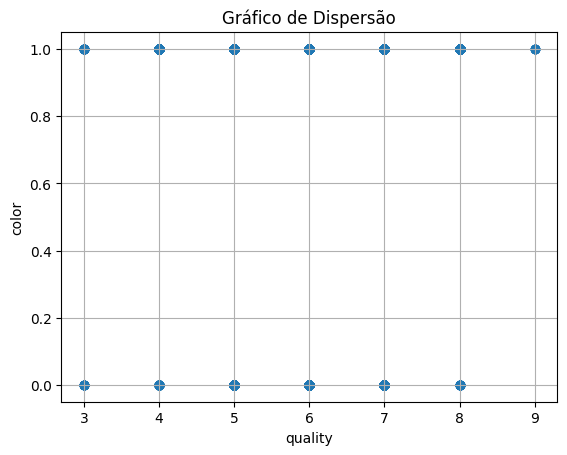

In [ ]:
# Plotando os gráficos de dispersão das variaveis qualidade e color
plot_scatter('quality','color')

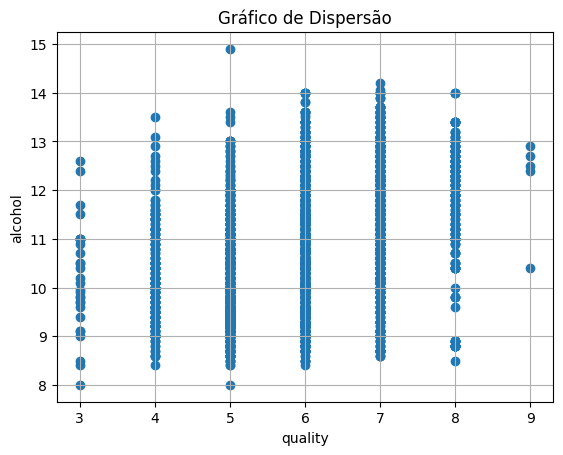

In [ ]:
# Plotando os gráficos de dispersão das variaveis qualidade e alcool no vinnho
plot_scatter('quality','alcohol')

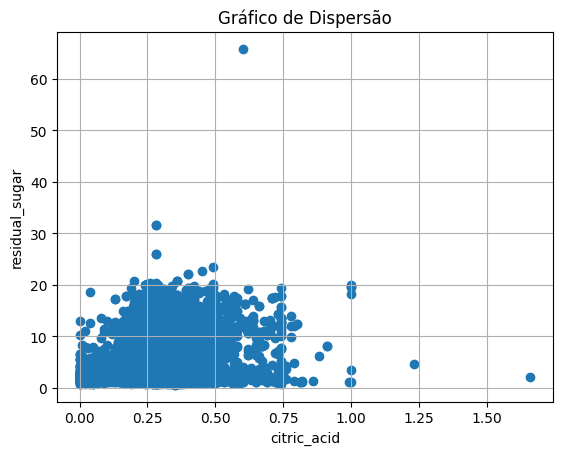

In [ ]:
# Plotando os gráficos de dispersão das variaveis ácido cítrico (imagino) e açucar
plot_scatter('citric_acid','residual_sugar')

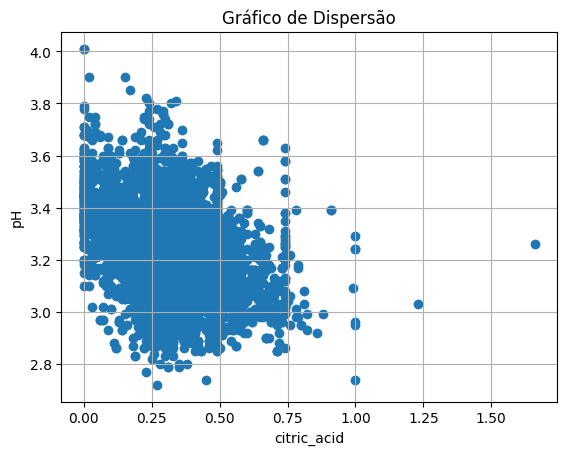

In [ ]:
# Plotando os gráficos de dispersão das variaveis ácido cítrico (imagino) e ph
plot_scatter('citric_acid','pH')

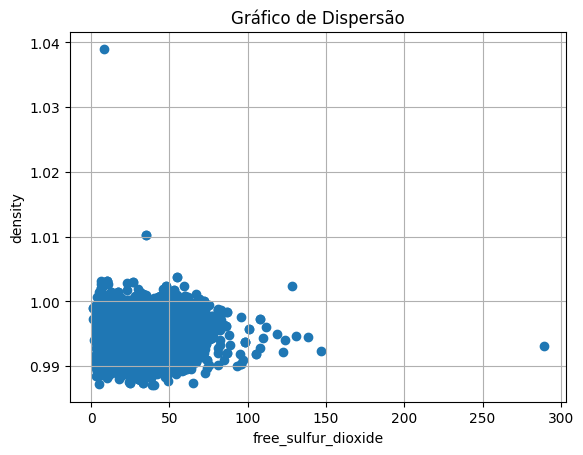

In [ ]:
# Plotando os gráficos de dispersão das variaveis dióxido de enxofre livre e densidade
plot_scatter('free_sulfur_dioxide','density')

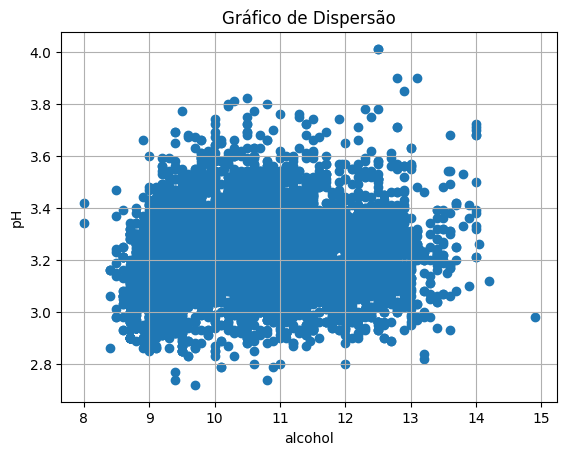

In [ ]:
# Plotando os gráficos de dispersão das variaveis alcool e ph
plot_scatter('alcohol','pH')

<Axes: xlabel='alcohol', ylabel='pH'>

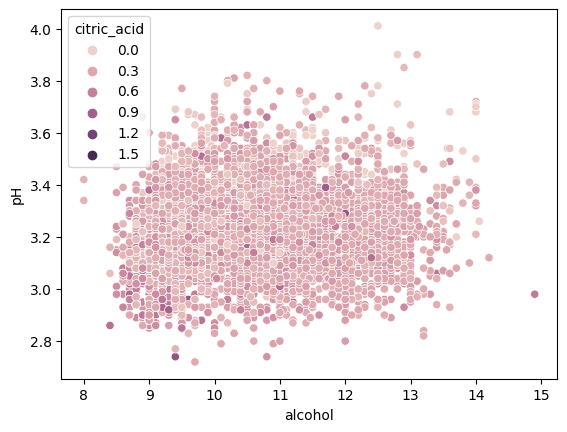

In [ ]:
sns.scatterplot(data = df, x = 'alcohol', y = 'pH', hue = 'citric_acid')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)
pca = PCA()
pca.fit(segmentation_std)
PCA(copy = True, iterated_power='auto', n_components=None, random_state=None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca.explained_variance_ratio_

array([0.29492412, 0.20484445, 0.12627433, 0.08311596, 0.06536559,
       0.05083677, 0.04407412, 0.04007519, 0.03618948, 0.02352702,
       0.01975193, 0.00917425, 0.00184679])

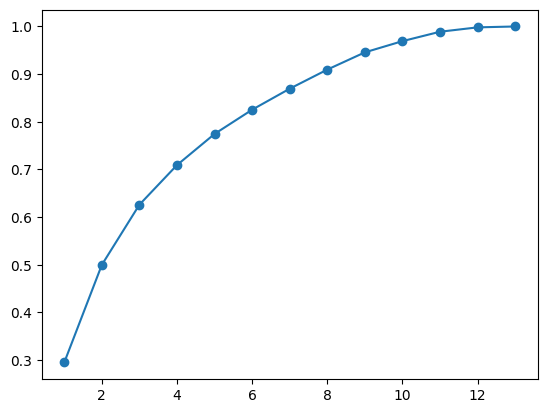

In [ ]:
plt.plot(range(1,(len(pca.explained_variance_ratio_)+1)), pca.explained_variance_ratio_.cumsum(), marker = 'o')

In [ ]:
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(segmentation_std))
(X)

,0,1
0,3.836749,0.094715
1,3.801439,0.732380
2,3.771011,0.488484
3,2.482573,1.379841
4,3.836749,0.094715
...,...,...
6492,-0.618824,-1.893143
6493,-1.651627,1.249227
6494,-0.925044,-0.540524
6495,-1.162099,-3.647187


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

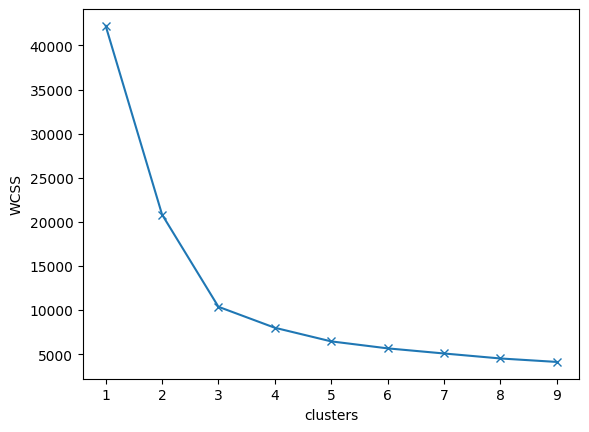

In [ ]:
scores_pca = pca.transform(segmentation_std)
# Integrando K-means com PCA
wcss = []
for i in range(1,10):
  k_means_pca = KMeans(n_clusters = i, init = 'k-means++')
  k_means_pca.fit(X)
  wcss.append(k_means_pca.inertia_)

plt.plot(range(1,10), wcss, marker = 'x')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Função para clusters e gráficos
def plot_clusters(x,y,nClusters,interacoes):

    kmeans = KMeans(n_clusters = int(nClusters), #numero de clusters
    init = 'k-means++', n_init = 100, #algoritmo que define a posição dos clusters de maneira mais assertiva
    max_iter = int(interacoes)) #numero máximo de iterações
    pred_y = kmeans.fit_predict(df)
    plt.scatter(df[x], df[y], c = pred_y) #posicionamento dos eixos x e y
    plt.grid() #função que desenha a grade no nosso gráfico
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0], c = 'red') #posição de cada centroide no gráfico
    plt.show()

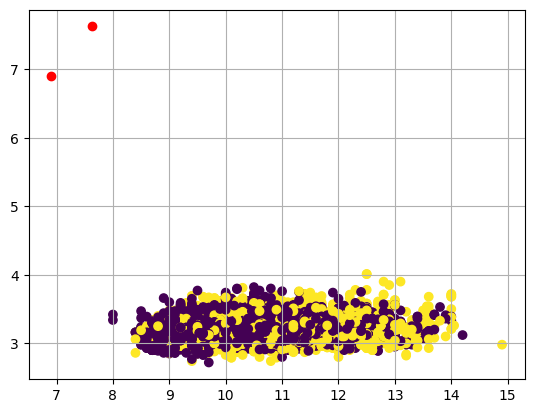

In [ ]:
plot_clusters('alcohol','pH',2,300)


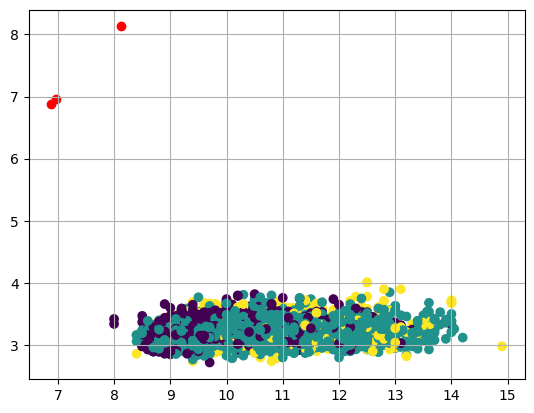

In [ ]:
plot_clusters('alcohol','pH',3,300)


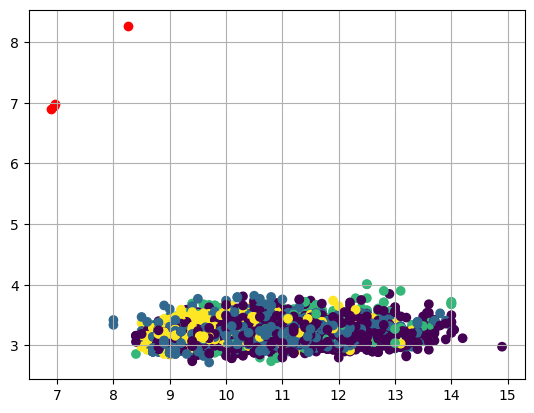

In [ ]:
plot_clusters('alcohol','pH',4,300)

In [ ]:
# Função para plotar o gráfico do método do cotovelo
def plot_elbow():
    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorção')
    plt.title('Método do Cotovelo')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

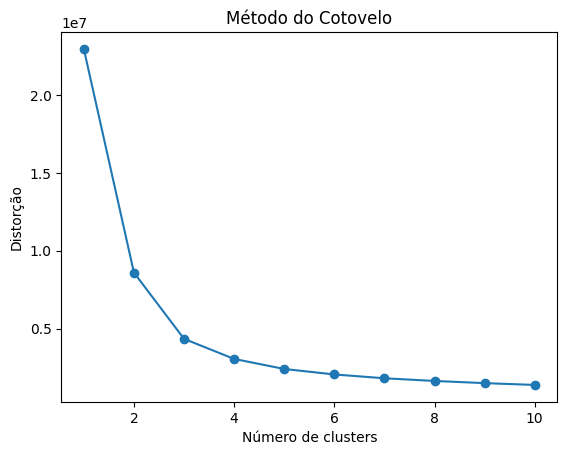

In [ ]:
plot_elbow()

In [ ]:
# Função para executar o K-Means e retornar os resultados
def run_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    return clusters
# Função para plotar o gráfico do coeficiente de silhueta
def plot_silhouette():
    silhouette_scores = []
    for k in range(2, 11):
        clusters = run_kmeans(k)
        silhouette_scores.append(silhouette_score(df, clusters))

    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Coeficiente de silhueta')
    plt.title('Coeficiente de Silhueta')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

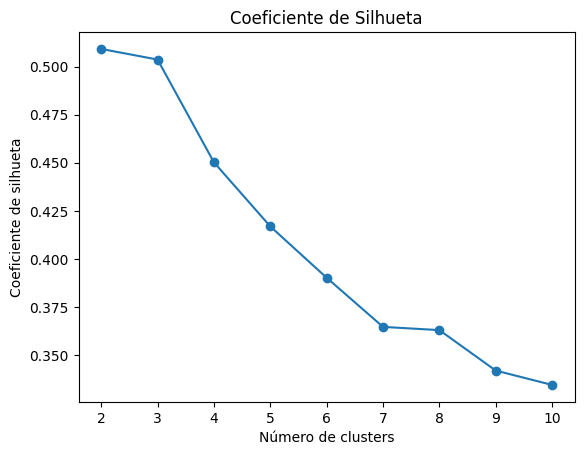

In [ ]:
plot_silhouette()

In [ ]:
# Executar o K-Means para 2, 3 e 4 grupos
clusters_2 = run_kmeans(2)
clusters_3 = run_kmeans(3)
clusters_4 = run_kmeans(4)

# Adicionar os agrupamentos ao conjunto de dados
df['cluster_2'] = clusters_2
df['cluster_3'] = clusters_3
df['cluster_4'] = clusters_4

# Salvar o conjunto de dados com os agrupamentos em uma planilha
output_path = '/content/qualidade_vinho_com_agrupamentos.csv'
df.to_csv(output_path, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
